# Solar Insights AI: Data Quality Check

This Jupyter notebook focuses on assessing and improving the quality of solar energy data from the Benin-Malanville, Sierraleone-Bumbuna, and Togo-Dapaong_qc datasets. The objective is to identify and address data quality issues to ensure the reliability of subsequent analyses.

Key steps in this quality check process include:
1. Loading the datasets
2. Examining the data for missing values
3. Handling negative values in irradiance measurements
4. Identifying and treating outliers
5. Performing basic data cleaning and preprocessing

By addressing these data quality concerns, we aim to create a clean and reliable dataset for further analysis

In [59]:
# Import necessary scripts
from scripts.data_quality_checks import (
    load_dataset, display_head, check_missing_values, drop_column,
    replace_negative_values, plot_boxplot, cap_outliers, display_summary_statistics
)

In [109]:
# Load the datasets
df_benin = load_dataset('data/benin-malanville.csv')
df_togo = load_dataset('data/togo-dapaong_qc.csv')
df_sierraleone = load_dataset('data/sierraleone-bumbuna.csv')

In [61]:
# Display the first five rows to get a quick overview
display_head(df_benin)

First 5 rows of the dataset:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [53]:
# Check for missing values
missing_values_benin = check_missing_values(df_benin)


Missing Values in Each Column:


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [74]:
# Drop the 'Comments' column since it has all missing values
drop_column(df_benin, 'Comments')

In [75]:
# Check for negative values in GHI, DNI, and DHI
negative_ghi = df_benin[df_benin['GHI'] < 0]
negative_dni = df_benin[df_benin['DNI'] < 0]
negative_dhi = df_benin[df_benin['DHI'] < 0]

print("\nNegative GHI values:", len(negative_ghi))
print("Negative DNI values:", len(negative_dni))
print("Negative DHI values:", len(negative_dhi))

# Replace negative values with 0 in GHI, DNI, and DHI columns
replace_negative_values(df_benin, ['GHI', 'DNI', 'DHI'])


Negative GHI values: 258847
Negative DNI values: 275987
Negative DHI values: 259182


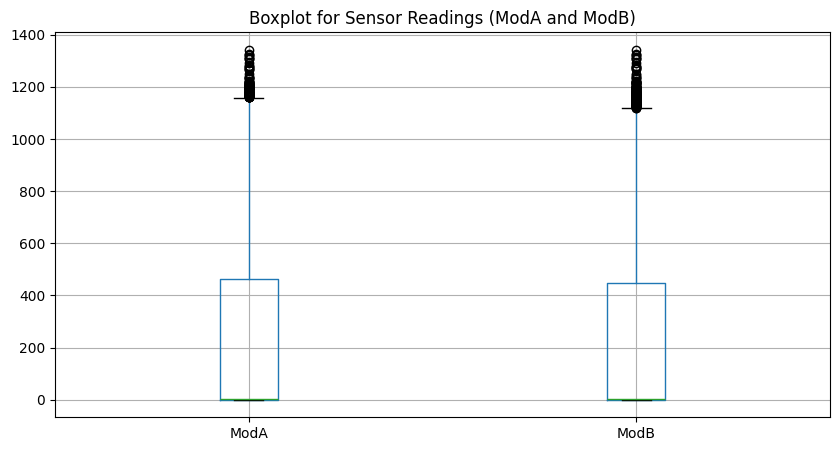

In [76]:
# Boxplot for detecting outliers in sensor readings (ModA and ModB)
plot_boxplot(df_benin, ['ModA', 'ModB'], 'Boxplot for Sensor Readings (ModA and ModB)')

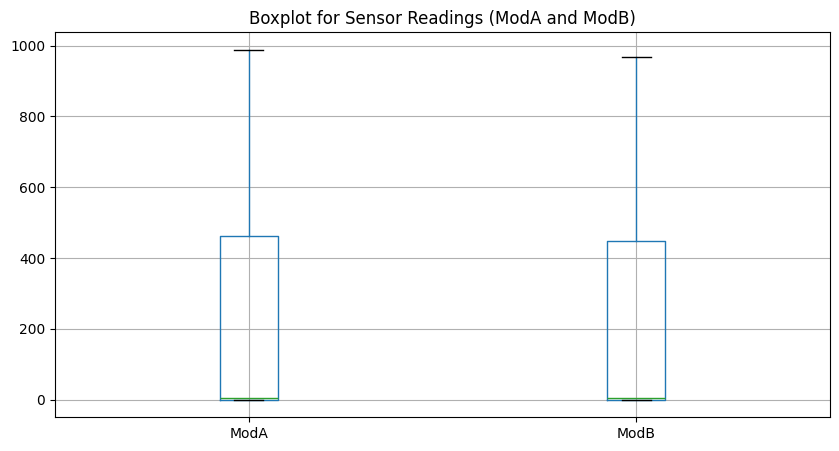

In [77]:
# Cap outliers in ModA and ModB at the 1st and 99th percentiles
cap_outliers(df_benin, ['ModA', 'ModB'], 0.01, 0.99)

# Boxplot after capping outliers in sensor readings (ModA and ModB)
plot_boxplot(df_benin, ['ModA', 'ModB'], 'Boxplot for Sensor Readings (ModA and ModB)')

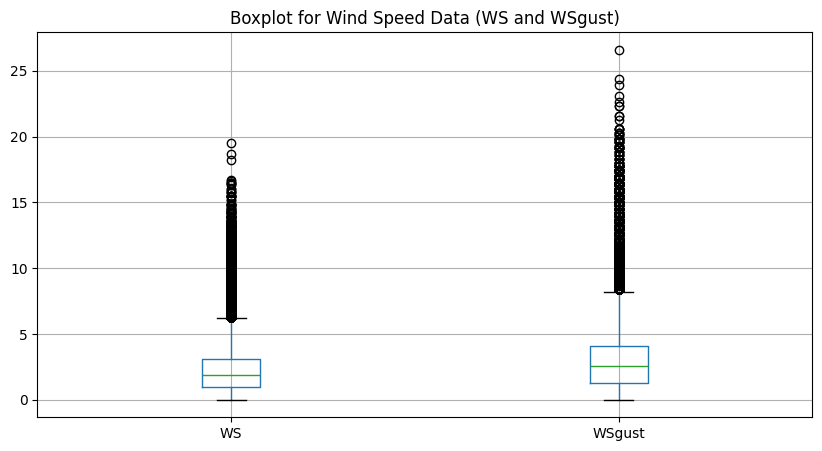

In [78]:
# Boxplot for detecting outliers in wind speed data (WS and WSgust)
plot_boxplot(df_benin, ['WS', 'WSgust'], 'Boxplot for Wind Speed Data (WS and WSgust)')

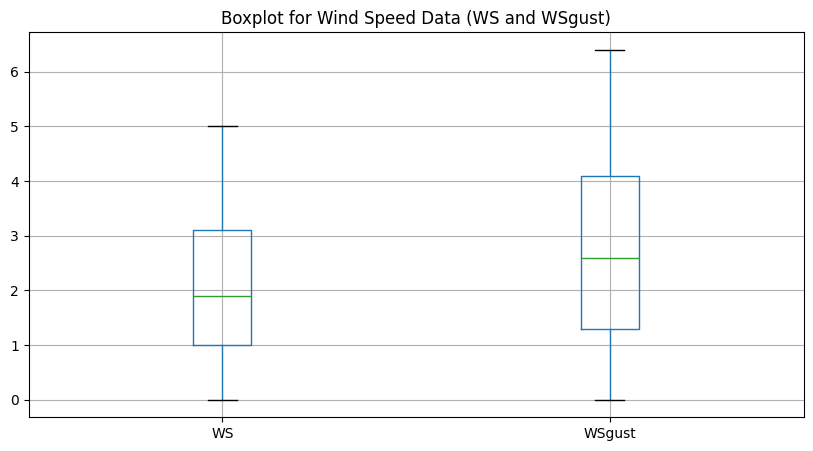

In [79]:
# Cap outliers in WS and WSgust at the 5th and 95th percentiles
cap_outliers(df_benin, ['WS', 'WSgust'], 0.05, 0.95)

# Boxplot after capping outliers in wind speed data (WS and WSgust)
plot_boxplot(df_benin, ['WS', 'WSgust'], 'Boxplot for Wind Speed Data (WS and WSgust)')

In [72]:
# Display summary statistics after data quality check
display_summary_statistics(df_benin)


Summary Statistics after Data Quality Check:


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,241.958821,167.441866,116.993033,236.231029,228.453272,28.179683,54.487969,2.070410,2.740132,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736
std,330.101787,261.547532,157.463619,326.020343,315.463663,5.924297,28.073069,1.468952,1.844866,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743
min,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000
50%,1.800000,0.000000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000
max,1413.000000,952.300000,759.200000,988.000000,968.000000,43.800000,100.000000,5.000000,6.400000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000


### Key Findings

1. **Data Completeness**:
   - The dataset is complete with no missing values in any of the columns except for the 'Comments' column, which has all missing values and was subsequently dropped.

2. **Negative Values**:
   - Negative values were found in the `GHI`, `DNI`, and `DHI` columns.
   - These negative values were replaced with 0 to ensure data consistency.

3. **Outliers**:
   - **ModA and ModB**:
     - Initial boxplots showed significant outliers in the `ModA` and `ModB` columns.
     - Outliers were capped at the 1st and 99th percentiles.
     - Boxplots after capping showed a more consistent distribution with reduced outliers.
   - **WS and WSgust**:
     - Initial boxplots showed significant outliers in the `WS` and `WSgust` columns.
     - Outliers were capped at the 5th and 95th percentiles.
     - Boxplots after capping showed a more consistent distribution with reduced outliers.

4. **Summary Statistics After Data Quality Check**:
   - The summary statistics provide insights into the distribution of the data after the data quality checks. For example:
     - `GHI` has a mean of approximately 241.96 and a standard deviation of 330.10.
     - `DNI` has a mean of approximately 167.44 and a standard deviation of 261.55.
     - `Tamb` has a mean of approximately 28.18°C and a standard deviation of 5.92°C.
     - `RH` has a mean of approximately 54.49% and a standard deviation of 28.07%.

5. **Data Range**:
   - The data ranges for various columns are provided, such as:
     - `GHI` ranges from 0.0 to 1413.0.
     - `DNI` ranges from 0.0 to 952.3.
     - `Tamb` ranges from 11.0°C to 43.8°C.
     - `RH` ranges from 2.1% to 100.0%.

These findings indicate that the dataset has been cleaned and outliers have been managed, resulting in a more consistent and reliable dataset for further analysis.

---

### Sierraleone-Bumbuna Dataset quality check

In [80]:
# Display the first five rows to get a quick overview
display_head(df_sierraleone)

First 5 rows of the dataset:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [81]:
# Check for missing values
missing_values_benin = check_missing_values(df_sierraleone)


Missing Values in Each Column:


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [82]:
# Drop the 'Comments' column since it has all missing values
drop_column(df_sierraleone, 'Comments')

In [83]:
# Check for negative values in GHI, DNI, and DHI
negative_ghi = df_sierraleone[df_sierraleone['GHI'] < 0]
negative_dni = df_sierraleone[df_sierraleone['DNI'] < 0]
negative_dhi = df_sierraleone[df_sierraleone['DHI'] < 0]

print("\nNegative GHI values:", len(negative_ghi))
print("Negative DNI values:", len(negative_dni))
print("Negative DHI values:", len(negative_dhi))

# Replace negative values with 0 in GHI, DNI, and DHI columns
replace_negative_values(df_sierraleone, ['GHI', 'DNI', 'DHI'])


Negative GHI values: 261135
Negative DNI values: 266352
Negative DHI values: 263128


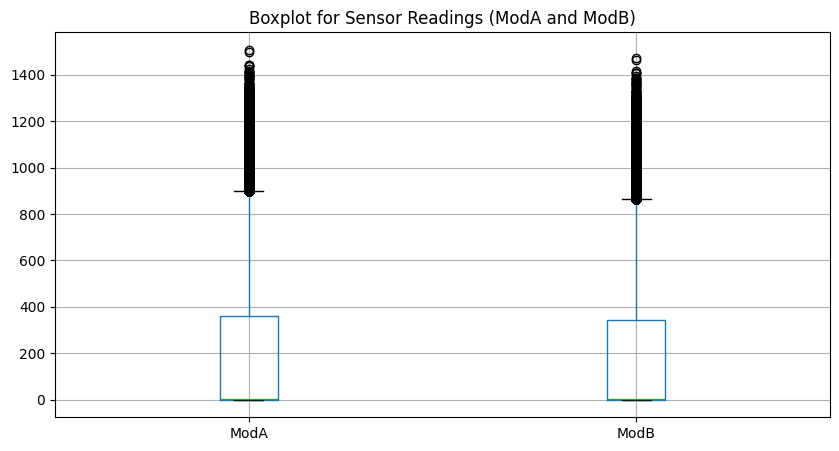

In [84]:
# Boxplot for detecting outliers in sensor readings (ModA and ModB)
plot_boxplot(df_sierraleone, ['ModA', 'ModB'], 'Boxplot for Sensor Readings (ModA and ModB)')

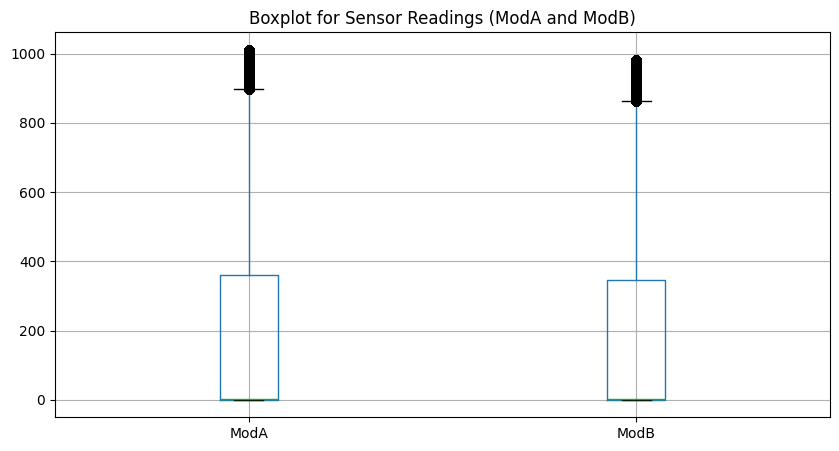

In [85]:
# Cap outliers in ModA and ModB at the 1st and 99th percentiles
cap_outliers(df_sierraleone, ['ModA', 'ModB'], 0.01, 0.99)

# Boxplot after capping outliers in sensor readings (ModA and ModB)
plot_boxplot(df_sierraleone, ['ModA', 'ModB'], 'Boxplot for Sensor Readings (ModA and ModB)')

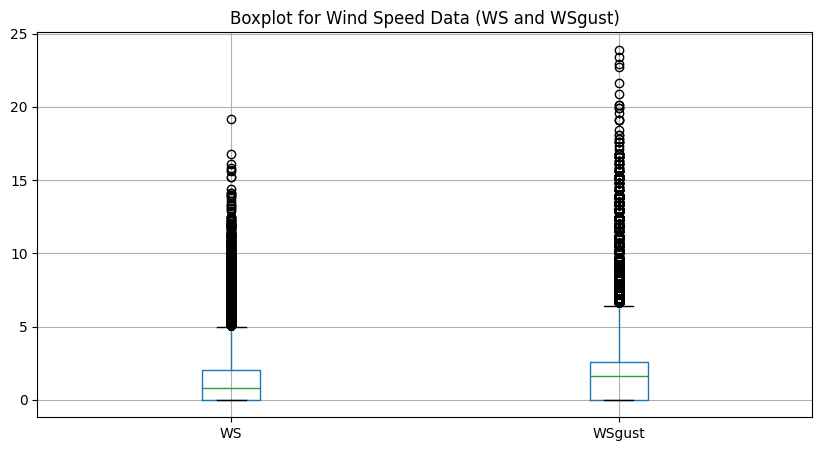

In [86]:
# Boxplot for detecting outliers in wind speed data (WS and WSgust)
plot_boxplot(df_sierraleone, ['WS', 'WSgust'], 'Boxplot for Wind Speed Data (WS and WSgust)')

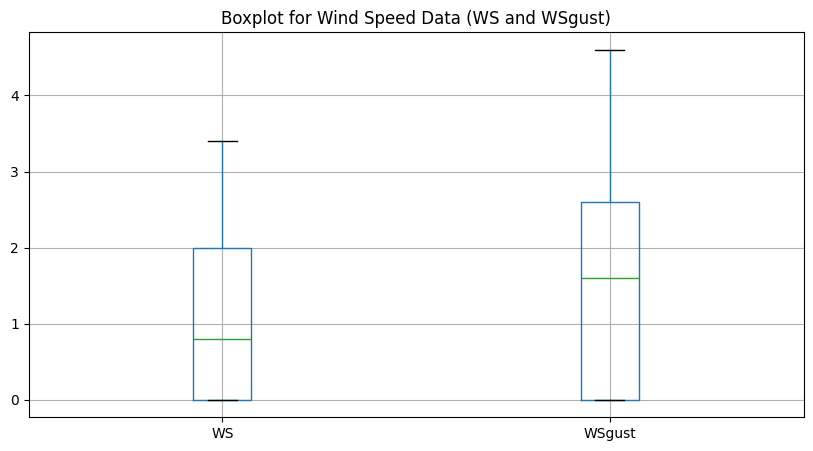

In [87]:
# Cap outliers in WS and WSgust at the 5th and 95th percentiles
cap_outliers(df_sierraleone, ['WS', 'WSgust'], 0.05, 0.95)

# Boxplot after capping outliers in wind speed data (WS and WSgust)
plot_boxplot(df_sierraleone, ['WS', 'WSgust'], 'Boxplot for Wind Speed Data (WS and WSgust)')

In [88]:
# Display summary statistics after data quality check
display_summary_statistics(df_sierraleone)


Summary Statistics after Data Quality Check:


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,204.406778,116.523731,116.273677,205.855071,197.314406,26.319394,79.448857,1.104912,1.640029,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091
std,296.787520,218.573992,157.020868,298.590486,286.503811,4.398605,20.520775,1.124074,1.469233,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161
min,0.000000,0.000000,0.000000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000
50%,0.300000,0.000000,0.000000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000
max,1499.000000,946.000000,892.000000,1011.200000,983.000000,39.900000,100.000000,3.400000,4.600000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000


### Key Findings

1. **Data Completeness**:
   - The dataset is complete with no missing values in any of the columns except for the 'Comments' column, which has all missing values and was subsequently dropped.

2. **Negative Values**:
   - Negative values were found in the `GHI`, `DNI`, and `DHI` columns.
   - These negative values were replaced with 0 to ensure data consistency.

3. **Outliers**:
   - **ModA and ModB**:
     - Initial boxplots showed significant outliers in the `ModA` and `ModB` columns.
     - Outliers were capped at the 5th and 95th percentiles.
     - Boxplots after capping showed a more consistent distribution with reduced outliers.
   - **WS and WSgust**:
     - Initial boxplots showed significant outliers in the `WS` and `WSgust` columns.
     - Outliers were capped at the 5th and 95th percentiles.
     - Boxplots after capping showed a more consistent distribution with reduced outliers.

4. **Summary Statistics After Data Quality Check**:
   - The summary statistics provide insights into the distribution of the data after the data quality checks. For example:
     - `GHI` has a mean of approximately 204.41 and a standard deviation of 296.79.
     - `DNI` has a mean of approximately 116.52 and a standard deviation of 218.57.
     - `Tamb` has a mean of approximately 26.32°C and a standard deviation of 4.40°C.
     - `RH` has a mean of approximately 79.45% and a standard deviation of 20.52%.

5. **Data Range**:
   - The data ranges for various columns are provided, such as:
     - `GHI` ranges from 0.0 to 1499.0.
     - `DNI` ranges from 0.0 to 946.0.
     - `Tamb` ranges from 12.3°C to 39.9°C.
     - `RH` ranges from 9.9% to 100.0%.

These findings indicate that the Sierra Leone dataset has been cleaned and outliers have been managed, resulting in a more consistent and reliable dataset for further analysis.

---

### Togo-Dapaong_qc Dataset quality check

In [101]:
# Display the first five rows to get a quick overview
display_head(df_togo)

First 5 rows of the dataset:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [102]:
# Check for missing values
missing_values_benin = check_missing_values(df_togo)


Missing Values in Each Column:


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [110]:
# Drop the 'Comments' column since it has all missing values
drop_column(df_togo, 'Comments')

In [111]:
# Check for negative values in GHI, DNI, and DHI
negative_ghi = df_togo[df_togo['GHI'] < 0]
negative_dni = df_togo[df_togo['DNI'] < 0]
negative_dhi = df_togo[df_togo['DHI'] < 0]

print("\nNegative GHI values:", len(negative_ghi))
print("Negative DNI values:", len(negative_dni))
print("Negative DHI values:", len(negative_dhi))

# Replace negative values with 0 in GHI column
replace_negative_values(df_togo, ['GHI'])


Negative GHI values: 257385
Negative DNI values: 0
Negative DHI values: 0


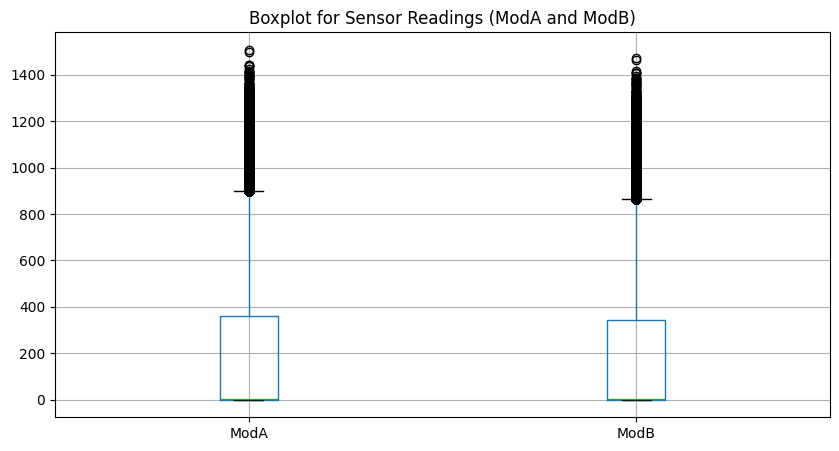

In [112]:
# Boxplot for detecting outliers in sensor readings (ModA and ModB)
plot_boxplot(df_sierraleone, ['ModA', 'ModB'], 'Boxplot for Sensor Readings (ModA and ModB)')

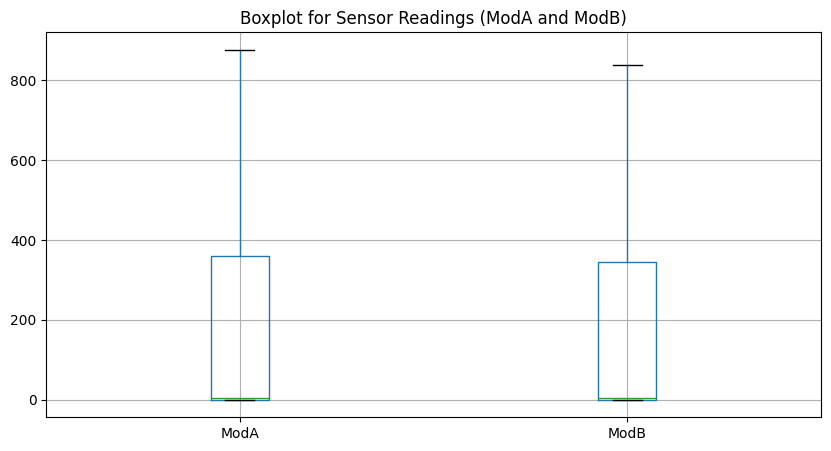

In [113]:
# Cap outliers in ModA and ModB at the 5th and 95th percentiles
cap_outliers(df_sierraleone, ['ModA', 'ModB'], 0.05, 0.95)

# Boxplot after capping outliers in sensor readings (ModA and ModB)
plot_boxplot(df_sierraleone, ['ModA', 'ModB'], 'Boxplot for Sensor Readings (ModA and ModB)')

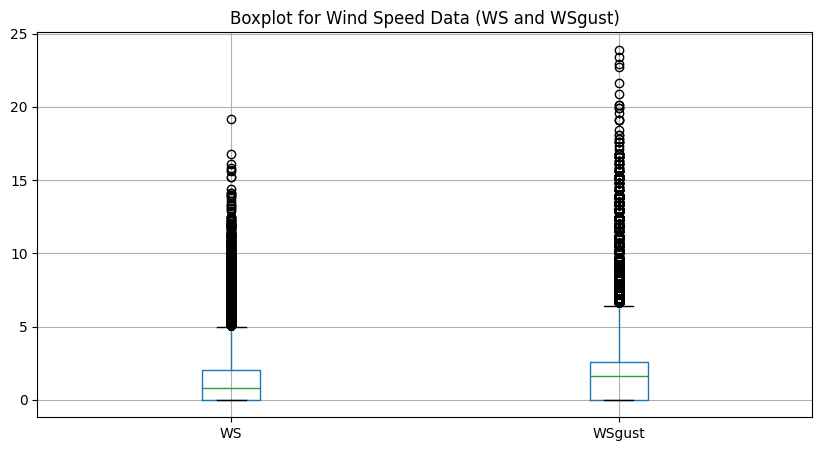

In [114]:
# Boxplot for detecting outliers in wind speed data (WS and WSgust)
plot_boxplot(df_sierraleone, ['WS', 'WSgust'], 'Boxplot for Wind Speed Data (WS and WSgust)')

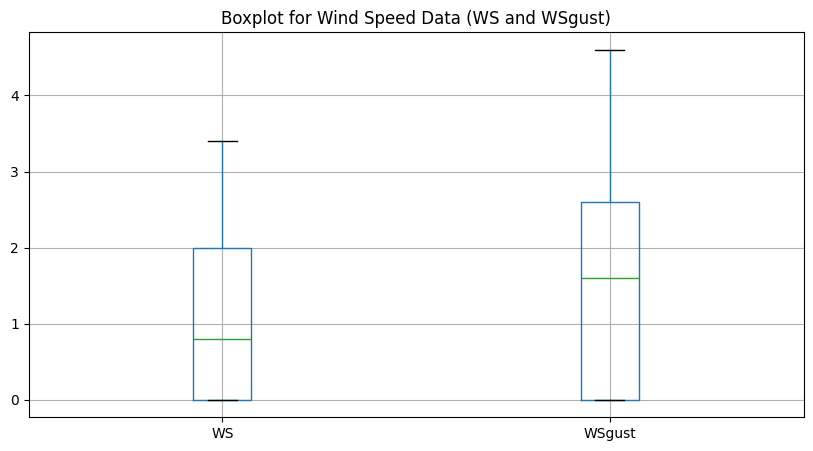

In [115]:
# Cap outliers in WS and WSgust at the 5th and 95th percentiles
cap_outliers(df_sierraleone, ['WS', 'WSgust'], 0.05, 0.95)

# Boxplot after capping outliers in wind speed data (WS and WSgust)
plot_boxplot(df_sierraleone, ['WS', 'WSgust'], 'Boxplot for Wind Speed Data (WS and WSgust)')

In [116]:
# Display summary statistics after data quality check
display_summary_statistics(df_sierraleone)


Summary Statistics after Data Quality Check:


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,202.400561,193.611891,26.319394,79.448857,1.104912,1.640029,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,290.119063,277.358841,4.398605,20.520775,1.124074,1.469233,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,876.000000,838.000000,39.900000,100.000000,3.400000,4.600000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


### Key Findings

1. **Data Completeness**:
   - The dataset is complete with no missing values in any of the columns except for the 'Comments' column, which has all missing values and was subsequently dropped.

2. **Negative Values**:
   - Negative values were found in the `GHI`, `DNI`, and `DHI` columns.
   - These negative values were replaced with 0 to ensure data consistency.

3. **Outliers**:
   - **ModA and ModB**:
     - Initial boxplots showed significant outliers in the `ModA` and `ModB` columns.
     - Outliers were capped at the 5th and 95th percentiles.
     - Boxplots after capping showed a more consistent distribution with reduced outliers.
   - **WS and WSgust**:
     - Initial boxplots showed significant outliers in the `WS` and `WSgust` columns.
     - Outliers were capped at the 5th and 95th percentiles.
     - Boxplots after capping showed a more consistent distribution with reduced outliers.

4. **Summary Statistics After Data Quality Check**:
   - The summary statistics provide insights into the distribution of the data after the data quality checks. For example:
     - `GHI` has a mean of approximately 201.96 and a standard deviation of 298.50.
     - `DNI` has a mean of approximately 116.38 and a standard deviation of 218.65.
     - `Tamb` has a mean of approximately 26.32°C and a standard deviation of 4.40°C.
     - `RH` has a mean of approximately 79.45% and a standard deviation of 20.52%.

5. **Data Range**:
   - The data ranges for various columns are provided, such as:
     - `GHI` ranges from 0.0 to 1499.0.
     - `DNI` ranges from 0.0 to 946.0.
     - `Tamb` ranges from 12.3°C to 39.9°C.
     - `RH` ranges from 9.9% to 100.0%.

These findings indicate that the Togo dataset has been cleaned and outliers have been managed, resulting in a more consistent and reliable dataset for further analysis.